In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [3]:
# train_X = train_X.astype("float64")
# train_y = train_y.astype("float64")
# test_X = test_X.astype("float64")
# test_y = test_X.astype("float64")

In [4]:
test_X = test_X/255
train_X = train_X/255

In [5]:
train_X.shape, train_y.shape

((60000, 28, 28), (60000,))

In [6]:
train_X.T[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
def get_one_hot_y(y):
    output = []
    for i in range(y.shape[0]):
        tmp = np.array([0]*10)
        tmp[train_y[i]] = 1
        output.append(tmp)
    return np.array(output).T

def get_flatten_X(X):
    output = []
    for i in range(X.shape[0]):
        output.append(X[i].flatten())
    return np.array(output).T

In [8]:
train_y_onehot = get_one_hot_y(train_y)
train_X_flatten = get_flatten_X(train_X)
test_y_onehot = get_one_hot_y(test_y)
test_X_flatten = get_flatten_X(test_X)

In [9]:
train_y_onehot.shape, test_y_onehot.shape

((10, 60000), (10, 10000))

In [10]:
train_X_flatten.shape, test_X_flatten.shape

((784, 60000), (784, 10000))

Label: 2
Y onehot: [0 0 1 0 0 0 0 0 0 0]


<Figure size 432x288 with 0 Axes>

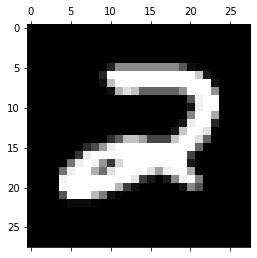

In [11]:
def plot_and_label_train_X(i):
    print("Label:", train_y[i])
    print("Y onehot:", train_y_onehot.T[i])
    plt.gray()
    plt.matshow(train_X[i])
    plt.show()

    # p = np.reshape(train_X_flatten.T[i].T,(28,28))
    # plt.gray()
    # plt.matshow(p)
    # plt.show()



plot_and_label_train_X(np.random.randint(0,1000))

In [12]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1-sigmoid(x))

def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A



In [13]:
# suppress warnings
#np.warnings.filterwarnings('ignore')


# init params
W1 = np.random.uniform(-0.5, 0.5, (10,784))
b1 = np.random.uniform(-0.5, 0.5, (10,1))
W2 = np.random.uniform(-0.5, 0.5, (10,10))
b2 = np.random.uniform(-0.5, 0.5, (10,1))

i = 0
m = 2

X = train_X_flatten.T[i:i+m].T # shape -> 784, m
Y = train_y_onehot.T[i:i+m].T

# forward prop
Z1 = W1@X+b1
A1 = ReLU(Z1)
Z2 = W2@A1+b2
A2 = softmax(Z2)

# backward prop
dZ2 = A2-Y
dW2 = 1/m*dZ2@A1.T
db2 = 1/m*np.sum(dZ2)
dZ1 = W2.T@dZ2 * ReLU_deriv(Z1)
dW1 = 1/m*dZ1@X.T
db1 = 1/m*np.sum(dZ1)

# update poram
learning_rate = 0.2
W1 = W1 - learning_rate * dW1
b1 = b1 - learning_rate * db1    
W2 = W2 - learning_rate * dW2  
b2 = b2 - learning_rate * db2    

In [14]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    # print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [15]:
print(train_y.shape ,train_y_onehot.shape, train_X_flatten.shape)

(60000,) (10, 60000) (784, 60000)


## TRAINING WITHOUT ITERATIONS

In [16]:
W1 = np.random.uniform(-0.5, 0.5, (10,784))
b1 = np.random.uniform(-0.5, 0.5, (10,1))
W2 = np.random.uniform(-0.5, 0.5, (10,10))
b2 = np.random.uniform(-0.5, 0.5, (10,1))


learning_rate = 0.1
epochs = 500

X = train_X_flatten # shape -> 784, m
Y = train_y_onehot
m = 60000

correct_predictions = 0
wrong_predictions = 0

for epoch in range(epochs):
    # forward prop
    Z1 = W1@X+b1
    A1 = ReLU(Z1)
    Z2 = W2@A1+b2
    A2 = softmax(Z2)

    # backward prop
    dZ2 = A2-Y
    dW2 = 1/m*dZ2@A1.T
    db2 = 1/m*np.sum(dZ2)
    dZ1 = W2.T@dZ2 * ReLU_deriv(Z1)
    dW1 = 1/m*dZ1@X.T
    db1 = 1/m*np.sum(dZ1)

    # update poram
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1    
    W2 = W2 - learning_rate * dW2  
    b2 = b2 - learning_rate * db2    

    # accuracy
    if epoch % 10 == 0 :
        # print(A2)
        print("Epoch: ", epoch)
        predictions = get_predictions(A2)
        print(get_accuracy(predictions, train_y))


Epoch:  0
0.10278333333333334
Epoch:  10
0.17718333333333333
Epoch:  20
0.2643333333333333
Epoch:  30
0.33391666666666664
Epoch:  40
0.3774
Epoch:  50
0.41068333333333334
Epoch:  60
0.4519666666666667
Epoch:  70
0.49335
Epoch:  80
0.5259166666666667
Epoch:  90
0.5583833333333333
Epoch:  100
0.5877
Epoch:  110
0.6115166666666667
Epoch:  120
0.63285
Epoch:  130
0.6502833333333333
Epoch:  140
0.6662666666666667
Epoch:  150
0.6794333333333333
Epoch:  160
0.6924
Epoch:  170
0.7037166666666667
Epoch:  180
0.7142166666666667
Epoch:  190
0.7251666666666666
Epoch:  200
0.7346666666666667
Epoch:  210
0.7442166666666666
Epoch:  220
0.7522
Epoch:  230
0.7605666666666666
Epoch:  240
0.7680333333333333
Epoch:  250
0.7752
Epoch:  260
0.7816666666666666
Epoch:  270
0.7874333333333333
Epoch:  280
0.79235
Epoch:  290
0.7968833333333334
Epoch:  300
0.8014333333333333
Epoch:  310
0.8056166666666666
Epoch:  320
0.8090333333333334
Epoch:  330
0.8125166666666667
Epoch:  340
0.81505
Epoch:  350
0.817883333333

## IMPLEMENTING BATCH SIZE? BUT I DON'T KNOW HOW WOULD IT HELP? WHY NOT JUST USE ALL THE DATA AT ONCE

Decreasing the batch size during training of a neural network can have several potential benefits:

1- Reducing memory requirements: A smaller batch size means that fewer training examples are processed in each iteration, which can reduce the amount of memory required to store the training data and intermediate results. This can be important for training larger neural networks or when working with limited memory resources.

2- More frequent weight updates: A smaller batch size means that the neural network is updated more frequently during each epoch, which can help to speed up the training process and potentially lead to better convergence. With a larger batch size, the weight updates are less frequent, and the optimizer may take longer to converge to the optimal weights.

3- Improved generalization: Smaller batches can help to prevent the neural network from overfitting to the training data by introducing more randomness and variation into the training process. This can help the network to generalize better to new data and improve its performance on the validation and test sets.

However, decreasing the batch size may also have some potential drawbacks:

1- Slower training convergence: With smaller batch sizes, the optimization process may require more iterations or epochs to converge to the optimal weights, which can result in longer training times.

2- Noisier weight updates: With smaller batch sizes, the gradient estimates may be noisier and less accurate, which can lead to more unstable training and slower convergence. This can be mitigated by using techniques such as momentum or weight decay.

3- Overall, the optimal batch size will depend on the specific neural network architecture, dataset, and optimization algorithm used, and it may require experimentation and tuning to find the best value.






## TRAINING WITH ITERATIONS AND MANIPULATIVE BATCH SIZE

Epoch: 0
0.08005
Epoch: 10
0.4264833333333333
Epoch: 20
0.6345333333333333
Epoch: 30
0.6916833333333333
Epoch: 40
0.69145
Epoch: 50
0.75165
Epoch: 60
0.7849
Epoch: 70
0.8115166666666667
Epoch: 80
0.8297
Epoch: 90
0.79705
Epoch: 100
0.8493666666666667
Epoch: 110
0.8491833333333333
Epoch: 120
0.8575666666666667
Epoch: 130
0.863
Epoch: 140
0.8675666666666667
Epoch: 150
0.8725166666666667
Epoch: 160
0.87625
Epoch: 170
0.8794666666666666
Epoch: 180
0.88255
Epoch: 190
0.8851166666666667
Epoch: 200
0.8875333333333333
Epoch: 210
0.8896833333333334
Epoch: 220
0.89165
Epoch: 230
0.8931666666666667
Epoch: 240
0.8949333333333334
Epoch: 250
0.8961833333333333


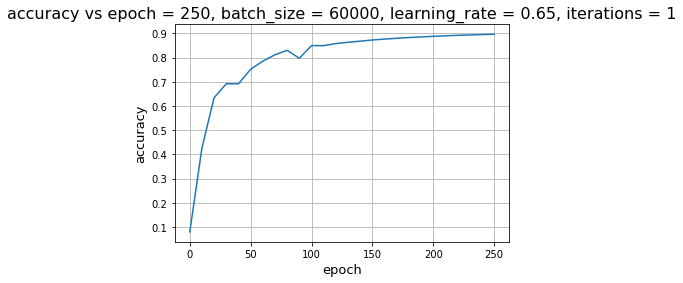

In [18]:
W1 = np.random.uniform(-0.5, 0.5, (10,784))
b1 = np.random.uniform(-0.5, 0.5, (10,1))
W2 = np.random.uniform(-0.5, 0.5, (10,10))
b2 = np.random.uniform(-0.5, 0.5, (10,1))

epochs = 250
batch_size = 60000//1
iterations = train_X_flatten.T.shape[0]//batch_size
learning_rate = 0.65

# m = batch_size
X = train_X_flatten # shape -> 784, m
Y = train_y_onehot # shape -< 10, m

# plot accuracy
accuracy_values = []
epoch_values = []

for epoch in range(epochs+1):

    for iteration in range(iterations):

        X = train_X_flatten.T[(iteration*batch_size):(iteration+1)*batch_size].T
        Y = train_y_onehot.T[(iteration*batch_size):(iteration+1)*batch_size].T
        # print(iter*batch_size)
        # forward prop
        Z1 = W1@X+b1
        A1 = ReLU(Z1)
        Z2 = W2@A1+b2
        A2 = softmax(Z2)

        # backward prop
        dZ2 = A2-Y
        dW2 = 1/m*dZ2@A1.T
        db2 = 1/m*np.sum(dZ2)
        dZ1 = W2.T@dZ2 * ReLU_deriv(Z1)
        dW1 = 1/m*dZ1@X.T
        db1 = 1/m*np.sum(dZ1)

        # update poram
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1    
        W2 = W2 - learning_rate * dW2  
        b2 = b2 - learning_rate * db2    

        # accuracy
        if epoch % 10 == 0:
            # print(A2)
            print("Epoch:", epoch,)
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, train_y.T[(iteration*batch_size):(iteration+1)*batch_size].T)
            print(accuracy)

            accuracy_values.append(accuracy)
            epoch_values.append(epoch)

fig = plt.figure(1)	#identifies the figure 
plt.title(f"accuracy vs epoch = {epoch}, batch_size = {batch_size}, learning_rate = {learning_rate}", fontsize='16')	#title
plt.plot(epoch_values, accuracy_values)	#plot the points
plt.xlabel("epoch",fontsize='13')	#adds a label in the x axis
plt.ylabel("accuracy",fontsize='13')	#adds a label in the y axis
# plt.savefig(f"epoch_{epoch} batch_size_{batch_size}.png")	#saves the figure in the present directory

plt.grid()	#shows a grid under the plot
plt.show()







## TEST ACCURACY WITH TEST DATA

In [20]:

X = test_X_flatten
Y = test_y

Z1 = W1@X+b1
A1 = ReLU(Z1)
Z2 = W2@A1+b2
A2 = softmax(Z2)

get_accuracy(get_predictions(A2), Y)


0.8958

## TESTING WITH RANDOM INDIVIDUAL DATA


(784, 1)
I am % 98.66 certain that it is:  9
Label: 9
Y onehot: [0 0 0 0 0 0 0 0 0 1]


<Figure size 432x288 with 0 Axes>

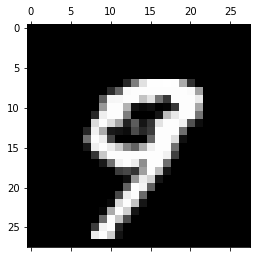

In [25]:
# index = 5151
index = np.random.randint(0,1000)
#plot_and_label_train_X(index)

X = train_X_flatten.T[index:index+1].T
y = train_y_onehot.T[index:index+1].T


Z1 = W1@X+b1
A1 = ReLU(Z1)
Z2 = W2@A1+b2
A2 = softmax(Z2)

print(f"I am % {np.around(np.max(A2)*100, 2)} certain that it is: ", np.argmax(A2))
plot_and_label_train_X(index)


In [ ]:
from nnfs.datasets import spiral_data

spiral_data